# Twitter breakout detection

## 0 Setup

In [104]:
if (!require("pacman")) install.packages("pacman")
#pacman::p_load("ggplot2")

install.packages("devtools")
devtools::install_github("williewheeler/BreakoutDetection")

library(BreakoutDetection)

Installing package into ‘/usr/local/lib/R/3.5/site-library’
(as ‘lib’ is unspecified)
Skipping install of 'BreakoutDetection' from a github remote, the SHA1 (8d99a7b4) has not changed since last install.
  Use `force = TRUE` to force installation


In [105]:
#set.seed(3141592)


## 1 Scribe dataset

In [106]:
# This comes from the BreakoutDetection package
data(Scribe)

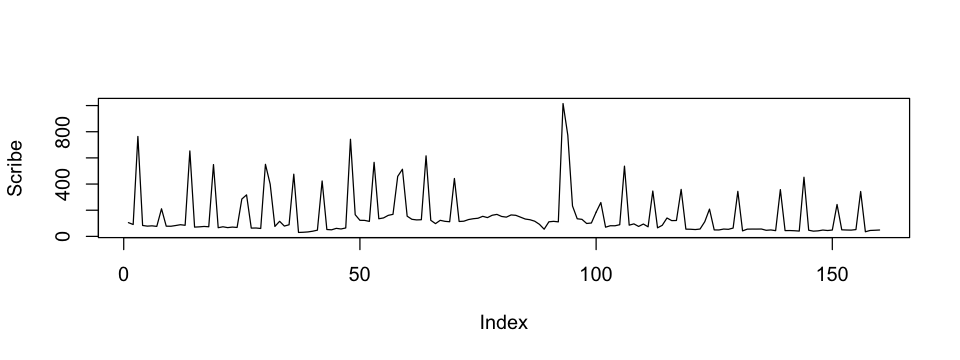

In [107]:
options(repr.plot.width=8, repr.plot.height=3)
plot(Scribe, type="l")

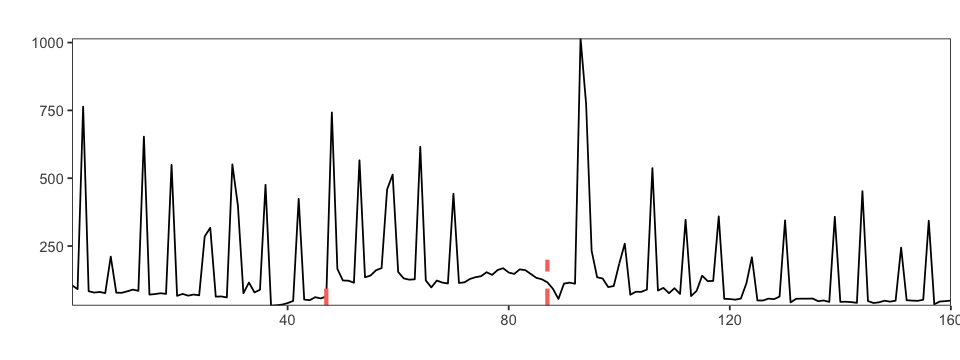

In [108]:
options(repr.plot.width=8, repr.plot.height=3)
res = breakout(Scribe, min.size=24, method='multi', beta=.001, degree=1, plot=TRUE)
res$plot

## 2 White noise dataset

In [109]:
set.seed(314159265)
wn1 <- rnorm(1000, mean=0, sd=1)
for (i in 600:1000) {
    wn1[i] <- wn1[i] + 2
}

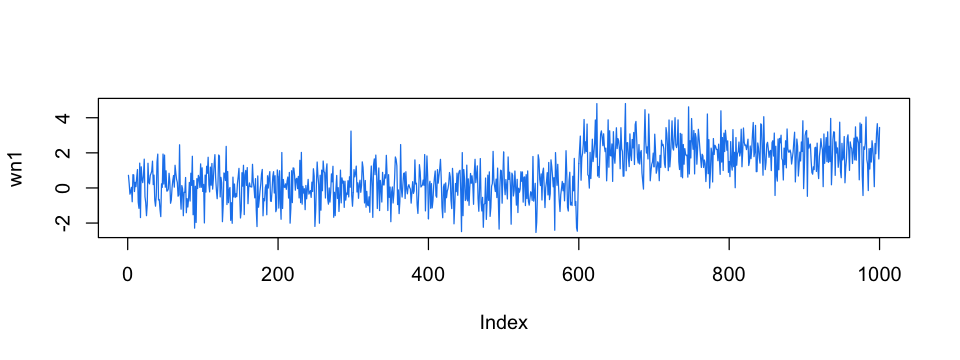

In [110]:
options(repr.plot.width=8, repr.plot.height=3)
plot(wn1, type="l", col="dodgerblue2")

$loc
[1] 600

$stat
[1] 18.02054

$time
[1] 0.024

$pval
[1] NA

$plot


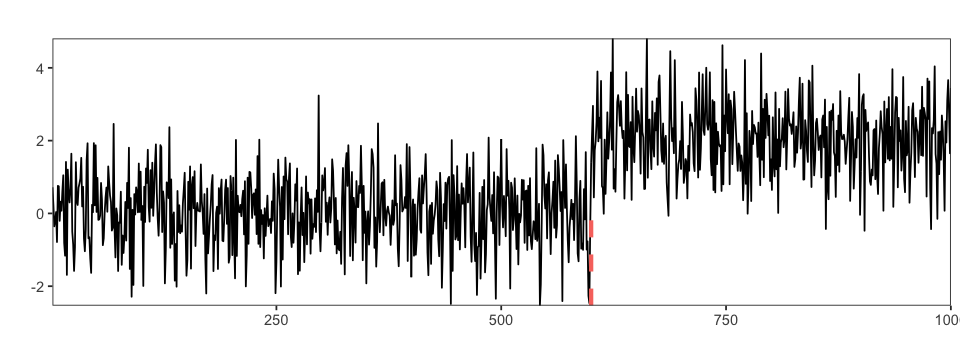

In [111]:
options(repr.plot.width=8, repr.plot.height=3)
result = breakout(wn1, min.size=24, method='amoc', alpha=2, plot=TRUE)
result

## 3 Online experiments

For an online breakout detector, we want to see whether we can catch breakouts near the right edge of the time series.

### 3.1 Experiment 1 - small windows

Here we want to see whether we can handle a "late" breakout, which means using a smaller window.

In [112]:
wn2 <- rnorm(1000, mean=50, sd=0.5)
for (i in 985:1000) {
    wn2[i] <- wn2[i] + 2
}

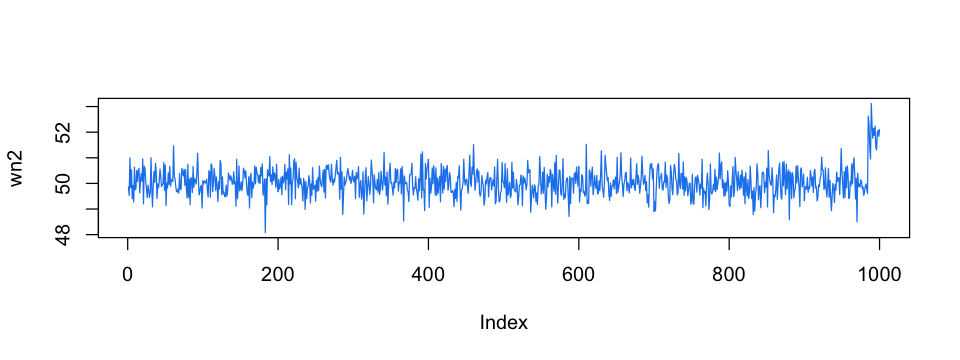

In [113]:
options(repr.plot.width=8, repr.plot.height=3)
plot(wn2, type="l", col="dodgerblue2")

$loc
integer(0)

$time
[1] 0.286

$pval
[1] NA

$plot


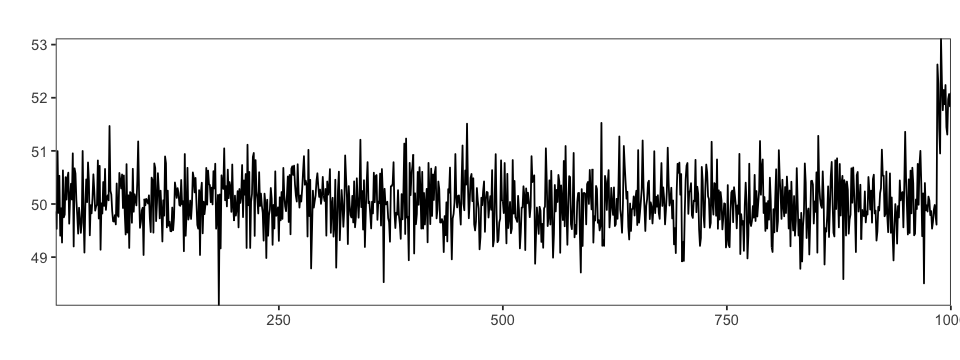

In [114]:
options(repr.plot.width=8, repr.plot.height=3)
wn2.res = breakout(wn2, min.size=10, method='multi', beta=0.004, degree=1, plot=TRUE)
wn2.res

### 3.3 Experiment 2 - small window + large shift

In [115]:
wn3 <- rnorm(1000, mean=5, sd=0.5)
for (i in 998:1000) {
    wn3[i] <- wn3[i] + 100
}

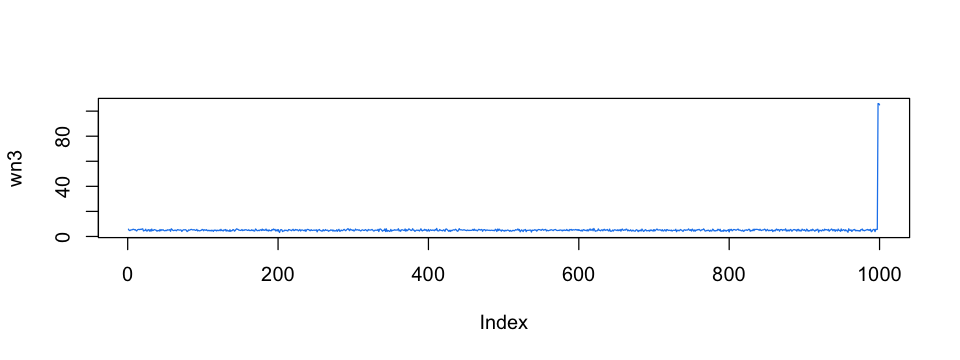

In [116]:
options(repr.plot.width=8, repr.plot.height=3)
plot(wn3, type="l", col="dodgerblue2")

$loc
[1] 995

$time
[1] 0.324

$pval
[1] NA

$plot


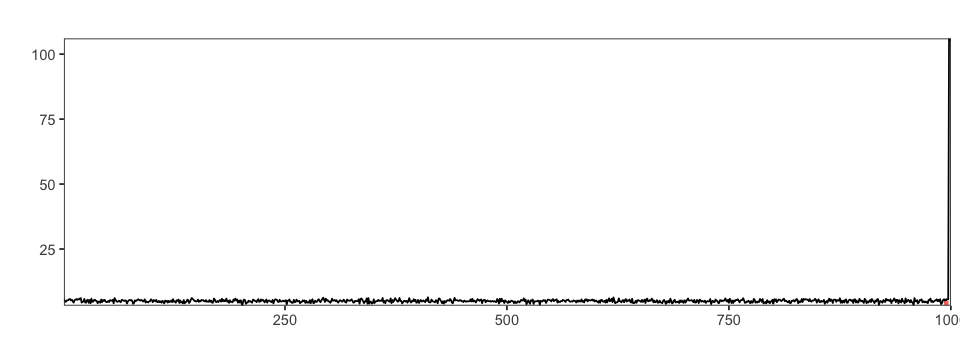

In [117]:
options(repr.plot.width=8, repr.plot.height=3)
wn3.res = breakout(wn3, min.size=2, method='multi', beta=0.004, degree=1, plot=TRUE)
wn3.res

### 3.4 Experiment 3 - small window, large shift, anomalies

In [118]:
# Hm, when n is large (like 100), the breakout detector is able to handle small breakouts but not large ones.
# But when n is smaller (like 10), the breakout detector can handle both large and small breakouts.
# Need to investigate further. It looks like it has to do with the test statistic, and how large distances between
# tau2 and tau1 drive up the test statistic. These large distances happen for large windows but not for small windows.
wn4 <- rnorm(20)
for (i in 16:20) {
    wn4[i] <- wn4[i] + 3
}

In [119]:
#wn4[92] <- 40

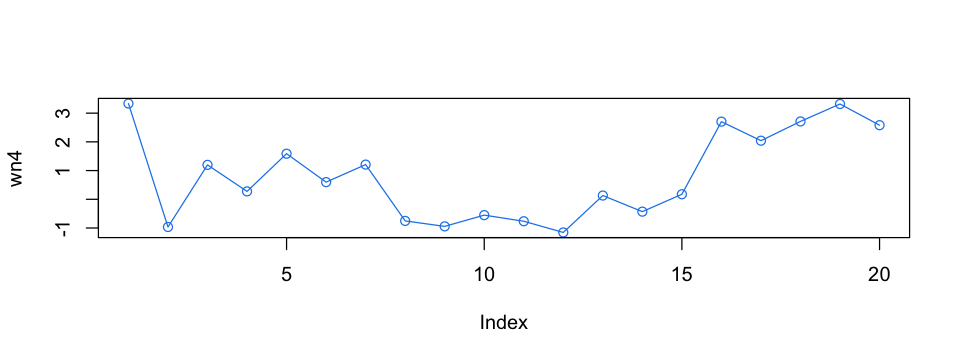

In [120]:
options(repr.plot.width=8, repr.plot.height=3)
plot(wn4, type="o", col="dodgerblue2")

$loc
[1] 14

$stat
[1] 1.624814

$time
[1] 0

$pval
[1] NA

$plot


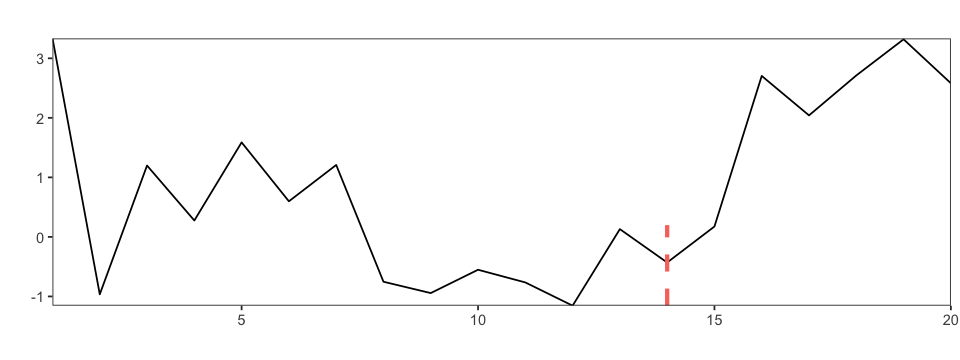

In [121]:
#help(breakout)
options(repr.plot.width=8, repr.plot.height=3)
#wn4.res = breakout(wn4, min.size=10, method='multi', beta=0.008, degree=1, plot=TRUE)
wn4.res = breakout(wn4, min.size=3, method='amoc', exact=TRUE, plot=TRUE)
wn4.res